In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("city.csv")

In [4]:
df.head()

ID            Name CountryCode       District  Population
0  1           Kabul         AFG          Kabol   1780000.0
1  2        Qandahar         AFG       Qandahar    237500.0
2  3           Herat         AFG          Herat    186800.0
3  4  Mazar-e-Sharif         AFG          Balkh    127800.0
4  5       Amsterdam         NLD  Noord-Holland    731200.0

In [5]:
df.shape

(4080, 5)

In [6]:
df.columns

Index(['ID', 'Name', 'CountryCode', 'District', 'Population'], dtype='object')

### 1 EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4080 non-null   object 
 1   Name         4079 non-null   object 
 2   CountryCode  4010 non-null   object 
 3   District     4006 non-null   object 
 4   Population   4007 non-null   float64
dtypes: float64(1), object(4)
memory usage: 159.5+ KB


In [8]:
df.describe()

Population
count  4.007000e+03
mean   3.458195e+05
std    6.964966e+05
min    4.200000e+01
25%    1.145945e+05
50%    1.670510e+05
75%    3.101885e+05
max    9.981619e+06

In [9]:
df.isnull().sum()

ID              0
Name            1
CountryCode    70
District       74
Population     73
dtype: int64

In [10]:
df[df['Name'].isnull()] # Safe to drop row 

ID Name CountryCode District  Population
2693  Tîghina  NaN         NaN      NaN         NaN

In [11]:
df.dropna(subset=['Name'],inplace = True)

In [12]:
df['CountryCode'].isnull().sum()

69

In [13]:
df['District'].isnull().sum()

73

- null value marke at unknown

In [14]:
df['CountryCode'].fillna('Unknown',inplace=True)
df['District'].fillna('Unknown',inplace=True)

/var/folders/my/6drnfy_n1pn29q2ftc3wpjzr0000gn/T/ipykernel_1395/52205901.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CountryCode'].fillna('Unknown',inplace=True)
/var/folders/my/6drnfy_n1pn29q2ftc3wpjzr0000gn/T/ipykernel_1395/52205901.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [15]:
df.isnull().sum()

ID              0
Name            0
CountryCode     0
District        0
Population     72
dtype: int64

In [16]:
# population is our numnerical value so we can fill with median()
df['Population'].fillna(df['Population'].median(), inplace=True)

/var/folders/my/6drnfy_n1pn29q2ftc3wpjzr0000gn/T/ipykernel_1395/475220981.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Population'].fillna(df['Population'].median(), inplace=True)


- population columns is an string format
- so convert string to numerical

In [17]:
df['Population'] = pd.to_numeric(df['Population'],errors='coerce') # errors="coerce" → invalid values become NaN

In [18]:
df['Population'].fillna(df['Population'].median(),inplace=True)

/var/folders/my/6drnfy_n1pn29q2ftc3wpjzr0000gn/T/ipykernel_1395/401509219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Population'].fillna(df['Population'].median(),inplace=True)


In [19]:
df.dtypes

ID              object
Name            object
CountryCode     object
District        object
Population     float64
dtype: object

In [20]:
df.isnull().sum() # ther is no nan value

ID             0
Name           0
CountryCode    0
District       0
Population     0
dtype: int64

In [21]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


### Generaly we do eda by manually but we also see automatically eda also

In [22]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_notebook_iframe()   # Jupyter me report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 137.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
# Save as html
profile.to_file("eda_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Manual EDA

In [24]:
df.columns

Index(['ID', 'Name', 'CountryCode', 'District', 'Population'], dtype='object')

In [25]:
##  I think id is not important so drop it
df.drop('ID',axis = 1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4079 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4079 non-null   object 
 1   CountryCode  4079 non-null   object 
 2   District     4079 non-null   object 
 3   Population   4079 non-null   float64
dtypes: float64(1), object(3)
memory usage: 159.3+ KB


In [27]:
df.head()

Name CountryCode       District  Population
0           Kabul         AFG          Kabol   1780000.0
1        Qandahar         AFG       Qandahar    237500.0
2           Herat         AFG          Herat    186800.0
3  Mazar-e-Sharif         AFG          Balkh    127800.0
4       Amsterdam         NLD  Noord-Holland    731200.0

In [28]:
df['CountryCode'].unique()

array(['AFG', 'NLD', 'ANT', 'ALB', 'DZA', 'Unknown', 'ASM', 'AND', 'AGO',
       'AIA', 'ATG', 'ARE', 'ARG', 'ARM', 'ABW', 'AUS', 'AZE', 'BHS',
       'BHR', 'BGD', 'BRB', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL',
       'BIH', 'BWA', 'BRA', 'GBR', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI',
       'CYM', 'CHL', 'COK', 'CRI', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'SLV', 'ERI', 'ESP', 'ZAF', 'ETH', 'FLK', 'FJI', 'PHL', 'FRO',
       'GAB', 'GMB', 'GEO', 'GHA', 'GIB', 'GRD', 'GRL', 'GLP', 'GUM',
       'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'SJM', 'IDN',
       'IND', 'IRQ', 'IRN', 'IRL', 'ISL', 'ISR', 'ITA', 'TMP', 'AUT',
       'JAM', 'JPN', 'YEM', 'JOR', 'CXR', 'YUG', 'KHM', 'CMR', 'CAN',
       'CPV', 'KAZ', 'KEN', 'CAF', 'CHN', 'KGZ', 'KIR', 'COL', 'COM',
       'COG', 'COD', 'CCK', 'PRK', 'KOR', 'GRC', 'HRV', 'CUB', 'KWT',
       'CYP', 'LAO', 'LVA', 'LSO', 'LBN', 'LBR', 'LBY', 'LIE', 'LTU',
       'LUX', 'ESH', 'MAC', 'MDG', 'MKD', 'MWI', 'MDV', 'MYS', 'MLI',
       'MLT', 'M

In [29]:
df['District'].value_counts()

District
Unknown                 73
England                 70
São Paulo               69
California              68
Punjab                  45
                        ..
Split-Dalmatia           1
Primorje-Gorski Kota     1
Osijek-Baranja           1
La Habana                1
Rafah                    1
Name: count, Length: 1352, dtype: int64

In [30]:
df['Name'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4075    False
4076    False
4077    False
4078    False
4079    False
Name: Name, Length: 4079, dtype: bool

In [31]:
df['District'].duplicated().sum()

2727

In [32]:
df.sort_values("Population", ascending=False).head()

Name CountryCode      District  Population
2330      Seoul         KOR         Seoul   9981619.0
205   São Paulo         BRA     São Paulo   9968485.0
1889   Shanghai         CHN      Shanghai   9696300.0
938     Jakarta         IDN  Jakarta Raya   9604900.0
2822    Karachi         PAK         Sindh   9269265.0

In [33]:
df.groupby("CountryCode")["Population"].sum()

CountryCode
ABW       29034.0
AFG     2332100.0
AGO     2561600.0
AIA        1556.0
ALB      270000.0
          ...    
YEM     1743700.0
YUG     2189507.0
ZAF    15196370.0
ZMB     2473500.0
ZWE     2730420.0
Name: Population, Length: 233, dtype: float64

In [34]:
df["CountryCode"].value_counts()

CountryCode
CHN    363
IND    302
USA    274
BRA    250
JPN    248
      ... 
FLK      1
CXR      1
MNP      1
PCN      1
FJI      1
Name: count, Length: 233, dtype: int64

In [35]:
df[df['CountryCode']== 'IND']

Name CountryCode        District  Population
1024               Delhi         IND           Delhi   7206704.0
1025  Calcutta [Kolkata]         IND    West Bengali   4399819.0
1027           Hyderabad         IND  Andhra Pradesh   2964638.0
1028           Ahmedabad         IND         Gujarat   2876710.0
1029           Bangalore         IND       Karnataka   2660088.0
...                  ...         ...             ...         ...
1359        Ambala Sadar         IND         Haryana     90712.0
1360          Baidyabati         IND    West Bengali     90601.0
1361               Morvi         IND         Gujarat     90357.0
1362             Raigarh         IND     Chhatisgarh     89166.0
1363            Vejalpur         IND         Gujarat     89053.0

[302 rows x 4 columns]

- Conclusion Name is city name
- so Name columns can be rename into City

In [36]:
df.rename(columns={'Name': 'City'}, inplace = True)

In [37]:
df.head()

City CountryCode       District  Population
0           Kabul         AFG          Kabol   1780000.0
1        Qandahar         AFG       Qandahar    237500.0
2           Herat         AFG          Herat    186800.0
3  Mazar-e-Sharif         AFG          Balkh    127800.0
4       Amsterdam         NLD  Noord-Holland    731200.0

### Eda on Numerical data
- Populations

In [38]:
df['Population'].describe()

count    4.079000e+03
mean     3.426640e+05
std      6.907220e+05
min      4.200000e+01
25%      1.154550e+05
50%      1.670510e+05
75%      3.042880e+05
max      9.981619e+06
Name: Population, dtype: float64

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df["Population"].skew()

7.908232154493763

Skewness measure karta hai data kitna tilted hai.

Rule:
	•	0 ke paas → normal distribution
	•	> 1 → highly skewed
	•	< -1 → left skewed

Skewness measure karta hai data kitna tilted hai.
7.9 → extremely right skewed
Rule:
	•	0 ke paas → normal distribution
	•	> 1 → highly skewed
	•	< -1 → left skewed


<Axes: >

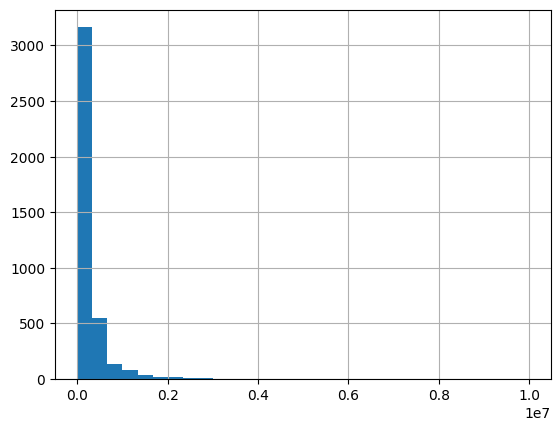

In [41]:
df["Population"].hist(bins=30)

In [42]:
import numpy as np
df["LogPopulation"] = np.log1p(df["Population"])

<Axes: >

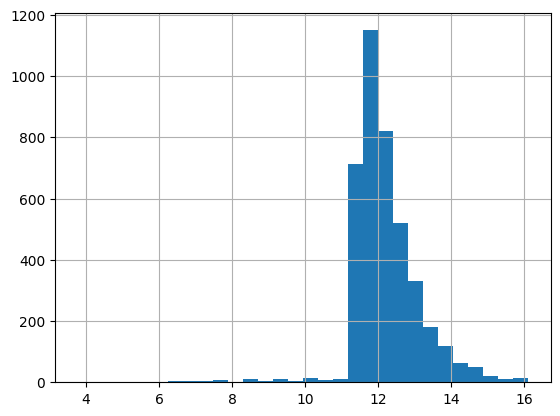

In [43]:
df["LogPopulation"].hist(bins=30)

Dataset tells:
- 1.	Most cities small hain.
- 2.	Few mega cities dominate.
- 3.	Population highly skewed hai.
- 4.	Log transform helpful hai modeling ke liye.

In [44]:
df.groupby("CountryCode")["Population"].mean().sort_values(ascending=False).head(10)

CountryCode
SGP    4017733.0
HKG    1650316.5
URY    1236000.0
GIN    1090610.0
UGA     890800.0
SLE     850000.0
LBR     850000.0
MLI     809552.0
AUS     808119.0
MNG     773700.0
Name: Population, dtype: float64

<Axes: xlabel='CountryCode'>

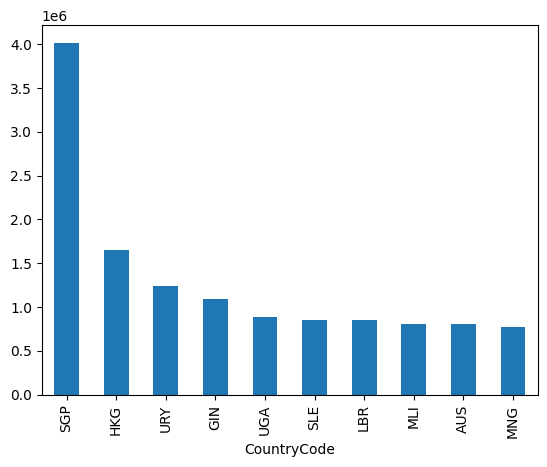

In [45]:
df.groupby("CountryCode")["Population"].mean()\
  .sort_values(ascending=False).head(10)\
  .plot(kind="bar")

<Axes: xlabel='District'>

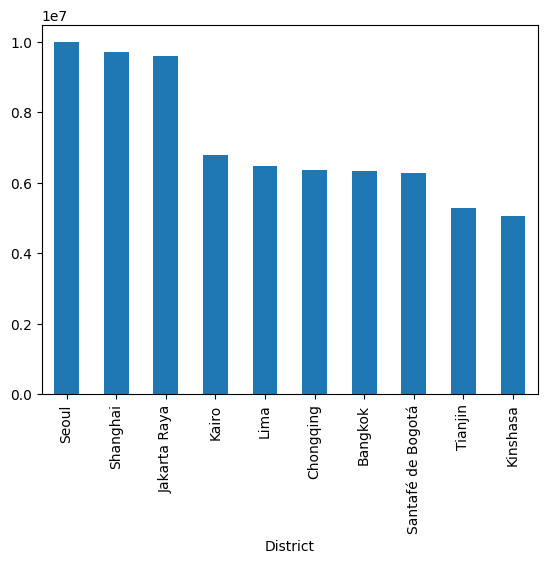

In [46]:
df.groupby("District")["Population"].mean()\
    .sort_values(ascending=False).head(10)\
    .plot(kind="bar")

In [47]:
df.groupby("District")["Population"].mean().sort_values(ascending=False).head(10)

District
Seoul                9981619.0
Shanghai             9696300.0
Jakarta Raya         9604900.0
Kairo                6789479.0
Lima                 6464693.0
Chongqing            6351600.0
Bangkok              6320174.0
Santafé de Bogotá    6260862.0
Tianjin              5286800.0
Kinshasa             5064000.0
Name: Population, dtype: float64

<Axes: xlabel='CountryCode'>

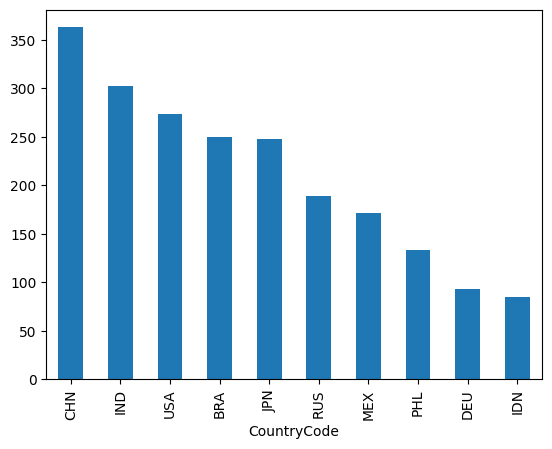

In [48]:
df["CountryCode"].value_counts().head(10).plot(kind="bar")

<Axes: xlabel='City'>

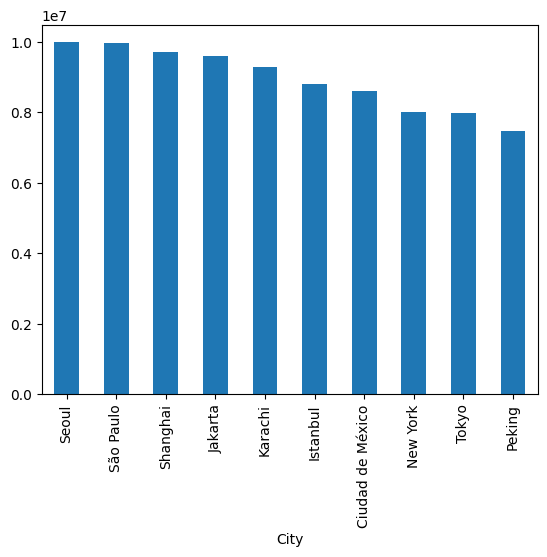

In [50]:
df.groupby("City")["Population"].mean()\
    .sort_values(ascending=False).head(10)\
    .plot(kind="bar")

In [52]:
df.columns

Index(['City', 'CountryCode', 'District', 'Population', 'LogPopulation'], dtype='object')

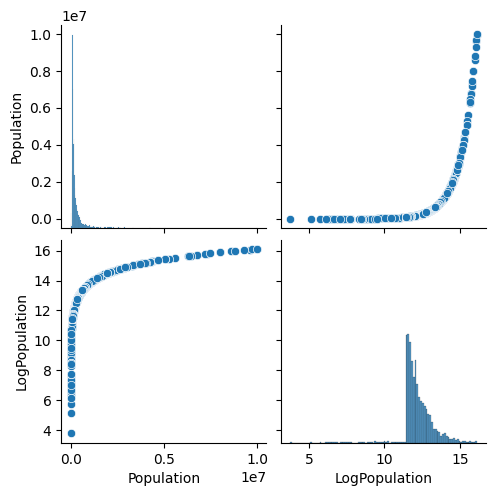

In [51]:
sns.pairplot(df)